<a href="https://colab.research.google.com/github/ImrulkayeSifat/DataScience/blob/main/Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/ImrulkayeSifat/DataScience/main/data2.txt'
data = pd.read_csv(url, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [1]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
  
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='red', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='green', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

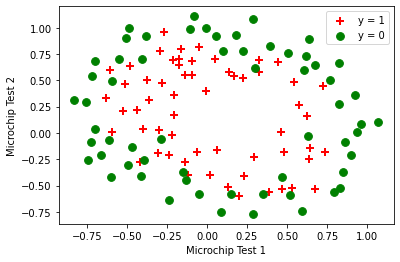

In [5]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [6]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values
X


array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [8]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
      for j in range(0, i+1):
        term1 = x1col ** (i-j)
        term2 = x2col ** (j)
        term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
        out   = np.hstack(( out, term ))
        
    return out

In [9]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)
XX

(118, 2) (118, 66)


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.50756332e-04,  2.05713421e-03,  2.80704704e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         4.16651692e-04, -3.07715393e-03,  2.27261199e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         2.40853745e-03, -7.80174092e-03,  2.52714199e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.33324699e-01, -4.81276442e-01,  9.92723934e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         3.99160874e-05, -6.29489121e-03,  9.92723934e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.08646006e-13, -1.49344370e-14,  7.22631762e-16]])

In [10]:
from scipy.special import expit 

def h(mytheta,myX): 
    return expit(np.dot(myX,mytheta))

In [19]:
def computeCost(mytheta,myX,myy,mylambda = 0.04): 

    m = myy.size 

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) 
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )


In [20]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           
    g = 1.0/(1.0+np.exp(-z))
    return g

In [21]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  # print(m,n)
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))                           
    err_i  = f_wb_i  - y[i]                      
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]        
  dj_dw = dj_dw/m                                   
      
  return dj_dw

In [23]:
# from scipy import optimize
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.04):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    # Calculate the gradient and update the parameters
    dj_dw = compute_gradient_logistic(myX, myy, w)   

    # Update Parameters using w, b, alpha and gradient
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    # Save cost J at each iteration
    if i<100000:      # prevent resource exhaustion 
        J_history.append( computeCost(w, myX, myy, mylambda) )

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.6911003774743663   
Iteration   10: Cost 0.6745309957576244   
Iteration   20: Cost 0.6624483269919691   
Iteration   30: Cost 0.6527584931002239   
Iteration   40: Cost 0.6444965118413686   
Iteration   50: Cost 0.637188120683964   
Iteration   60: Cost 0.630576610813018   
Iteration   70: Cost 0.6245077907311783   
Iteration   80: Cost 0.6188798936108779   
Iteration   90: Cost 0.6136205470407993   
(66,)
0.6091570888490606


In [26]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .01
    iters = 10000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.6929404868391428   
Iteration 1000: Cost 0.6091910684196054   
Iteration 2000: Cost 0.5705139225509426   
Iteration 3000: Cost 0.5430090493876225   
Iteration 4000: Cost 0.5216640059851467   
Iteration 5000: Cost 0.5044460455455257   
Iteration 6000: Cost 0.4902121823206805   
Iteration 7000: Cost 0.4782268460496527   
Iteration 8000: Cost 0.46798522396812753   
Iteration 9000: Cost 0.45912687069567465   
[ 1.24645471e+00  7.21868758e-01  1.32555405e+00 -2.02436991e+00
 -9.25643166e-01 -1.18335476e+00  2.31155012e-01 -4.07314060e-01
 -4.09444907e-01 -1.25591859e-02 -1.48406755e+00 -8.56083371e-02
 -6.55472908e-01 -2.91828574e-01 -1.04779454e+00 -1.59735155e-01
 -2.38739569e-01 -7.70608823e-02 -2.88654520e-01 -3.27597297e-01
 -3.25728607e-01 -1.04919797e+00  6.05135158e-03 -3.19432401e-01
 -5.21571246e-03 -3.43318149e-01 -1.60480909e-01 -8.12041838e-01
 -3.01862530e-01 -1.22713076e-01 -5.76626107e-02 -1.25208367e-01
 -5.09004392e-02 -1.82211706e-01 -2.18931937e-01

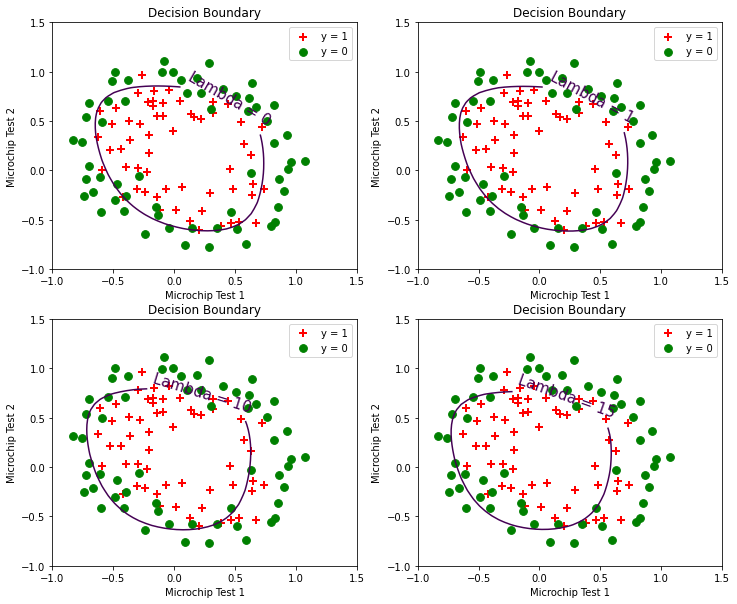

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.04)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,15.)